column descriptions:
https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

# Import everything

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_set = pd.read_csv('kc_house_data_train.csv', index_col = 0) # read the data

In [3]:
data_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# All columns of independent variables. Dropped id and price

In [4]:
data_set.columns
all_cols = list(data_set.columns)
all_cols.remove('id')

price_col = data_set['price']
all_cols.remove('price')

data_set.nunique() # check number of unique values for each column, some like zipcode look categorical but

id               17176
date               371
price             3534
bedrooms            13
bathrooms           30
sqft_living        947
sqft_lot          8428
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         867
sqft_basement      290
yr_built           116
yr_renovated        69
zipcode             70
lat               4837
long               733
sqft_living15      714
sqft_lot15        7582
dtype: int64

# Change date from str to datetime.date type

In [5]:
from datetime import date

data_set['date'] = data_set.date.apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
data_set.date_time = data_set.date.apply(lambda x: date.fromisoformat(x))
type(data_set.date_time[0])

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


datetime.date

# Find the number of days passed -> just drop this, very sure there is no correlation

In [6]:
import copy
min_date = copy.deepcopy(min(data_set.date_time))
data_set['date2'] = data_set.date_time.apply(lambda x: (x - min_date).days)
data_set.date2

0        157
1        111
2        105
3        333
4         73
        ... 
17285    305
17286     18
17287     12
17288    216
17289    259
Name: date2, Length: 17290, dtype: int64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.294
Date:                Thu, 20 Feb 2020   Prob (F-statistic):              0.255
Time:                        14:57:25   Log-Likelihood:            -2.4637e+05
No. Observations:               17290   AIC:                         4.927e+05
Df Residuals:                   17288   BIC:                         4.928e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.459e+05   5338.636    102.251      0.000    5.35e+05    5.56e+05
date2        -28.5574     25.101     -1.138      0.255     -77.758      20.643
==============================================================================
Omnibus:                    16029.007   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1120852.789
Skew:                           4.282   Prob(JB):                         0.00
Kurtosis:                      41.503   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

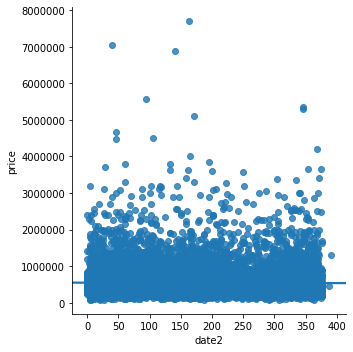

In [7]:
#### Plot price by date (days from earliest house sold)
### We see that we have only about a year of data so we can't really split by year/month

# data_set.plot(x = 'date2', y = 'price', kind = 'scatter')

sns.lmplot(x='date2', y='price', data=data_set,fit_reg=True) # above is just without regression line

ols(formula = 'price~date2', data = data_set).fit().summary()

# Check what model was like before dropping from all_cols and after

In [8]:
all_cols.remove('date')
all_cols.append('date2')
len(all_cols), all_cols

(19,
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'date2'])

# Before dropping #R^2 = 0.699

In [9]:
predict_this = 'price'
ind_vars = '+'.join(all_cols)
ols(formula = predict_this+'~'+ind_vars, data = data_set).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2232.
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:57:32   Log-Likelihood:            -2.3598e+05
No. Observations:               17290   AIC:                         4.720e+05
Df Residuals:                   17271   BIC:                         4.721e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.39e+06   3.32e+06      1.322      0.186   -2.12e+06    1.09e+07
bedrooms      -3.642e+04   2112.484    -17.241      0.000   -4.06e+04   -3.23e+04
bathrooms      4.156e+04   3693.753     11.251      0.000    3.43e+04    4.88e+04
sqft_living     114.1703      2.569     44.446      0.000     109.135     119.205
sqft_lot          0.1013      0.052      1.943      0.052      -0.001       0.204
floors         5939.0777   4086.973      1.453      0.146   -2071.803    1.39e+04
waterfront     5.938e+05   1.93e+04     30.813      0.000    5.56e+05    6.32e+05
view           5.226e+04   2411.750     21.670      0.000    4.75e+04     5.7e+04
condition      2.758e+04   2670.378     10.328      0.000    2.23e+04    3.28e+04
grade          9.565e+04   2454.593     38.969      0.000    9.08e+04       1e+05
sqft_above       73.0900      2.573     28.407      0.000      68.047      78.133
sqft_basement    41.0816      3.003     13.681      0.000      35.196      46.967
yr_built      -2656.2555     82.409    -32.232      0.000   -2817.786   -2494.725
yr_renovated     18.2150      4.168      4.370      0.000      10.045      26.385
zipcode        -566.3760     37.453    -15.123      0.000    -639.787    -492.965
lat            6.045e+05   1.22e+04     49.492      0.000    5.81e+05    6.28e+05
long          -2.203e+05   1.49e+04    -14.825      0.000   -2.49e+05   -1.91e+05
sqft_living15    22.3879      3.922      5.709      0.000      14.701      30.075
sqft_lot15       -0.3174      0.082     -3.882      0.000      -0.478      -0.157
date2           112.8816     13.824      8.166      0.000      85.786     139.977
==============================================================================
Omnibus:                    15336.639   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1751123.566
Skew:                           3.785   Prob(JB):                         0.00
Kurtosis:                      51.717   Cond. No.                     4.30e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.5e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Drop date from all_cols (the functional column is date2 which was not ever added to all_cols)

In [10]:
all_cols.remove('date')

ValueError: list.remove(x): x not in list

In [11]:
all_cols.remove('date2')

In [12]:
len(all_cols), all_cols

(18,
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15'])

# After dropping #R^2 = 0.698

In [13]:
predict_this = 'price'
ind_vars = '+'.join(all_cols)
ind_vars
ols(formula = predict_this+'~'+ind_vars, data = data_set).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2350.
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:57:51   Log-Likelihood:            -2.3601e+05
No. Observations:               17290   AIC:                         4.721e+05
Df Residuals:                   17272   BIC:                         4.722e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.567e+06   3.33e+06      1.372      0.170   -1.96e+06    1.11e+07
bedrooms      -3.627e+04   2116.413    -17.137      0.000   -4.04e+04   -3.21e+04
bathrooms      4.126e+04   3700.592     11.150      0.000     3.4e+04    4.85e+04
sqft_living     114.2295      2.574     44.384      0.000     109.185     119.274
sqft_lot          0.1044      0.052      1.998      0.046       0.002       0.207
floors         5600.2941   4094.525      1.368      0.171   -2425.390    1.36e+04
waterfront     5.947e+05   1.93e+04     30.803      0.000    5.57e+05    6.33e+05
view           5.252e+04   2416.118     21.739      0.000    4.78e+04    5.73e+04
condition      2.627e+04   2670.585      9.835      0.000     2.1e+04    3.15e+04
grade          9.527e+04   2458.796     38.745      0.000    9.04e+04       1e+05
sqft_above       73.1255      2.578     28.366      0.000      68.073      78.178
sqft_basement    41.1029      3.008     13.663      0.000      35.206      47.000
yr_built      -2653.6616     82.565    -32.140      0.000   -2815.498   -2491.825
yr_renovated     17.4437      4.175      4.178      0.000       9.260      25.627
zipcode        -567.4119     37.523    -15.122      0.000    -640.962    -493.862
lat            6.021e+05   1.22e+04     49.222      0.000    5.78e+05    6.26e+05
long          -2.208e+05   1.49e+04    -14.830      0.000    -2.5e+05   -1.92e+05
sqft_living15    22.0718      3.929      5.618      0.000      14.371      29.773
sqft_lot15       -0.3200      0.082     -3.907      0.000      -0.481      -0.159
==============================================================================
Omnibus:                    15315.583   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1731673.987
Skew:                           3.780   Prob(JB):                         0.00
Kurtosis:                      51.441   Cond. No.                     4.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.71e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
data_set[all_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 18 columns):
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(4), int64(14)
memory usage: 3.1 MB


In [15]:
len(all_cols), all_cols

(18,
 ['bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15'])

# Check the scatter plots of each

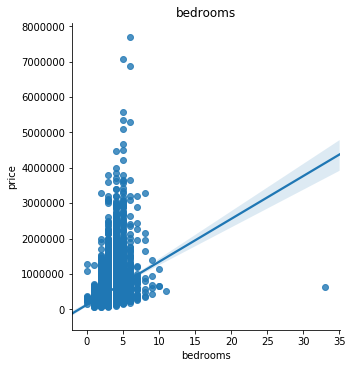

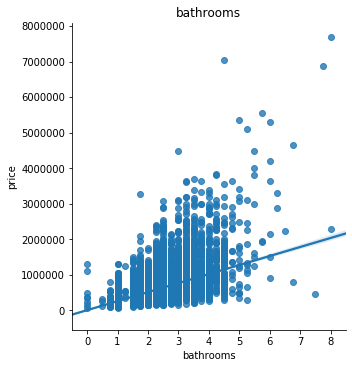

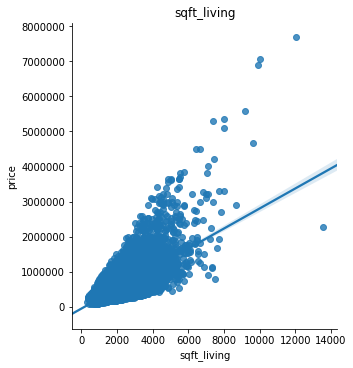

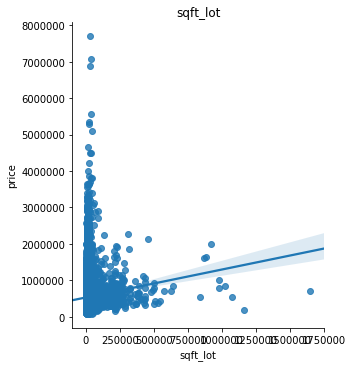

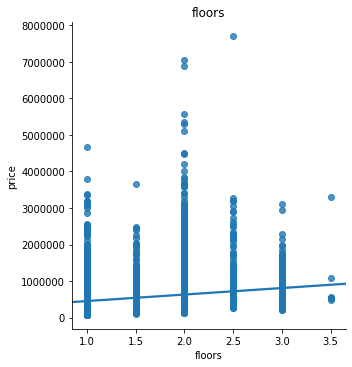

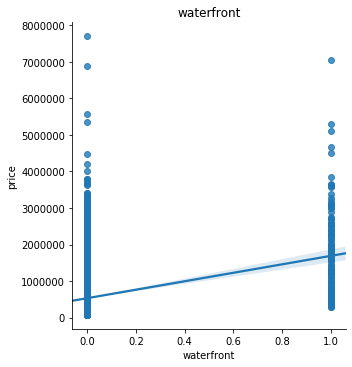

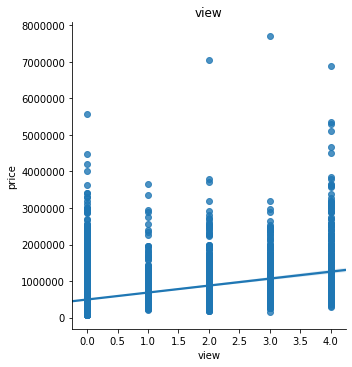

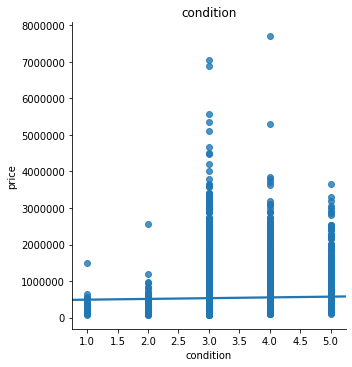

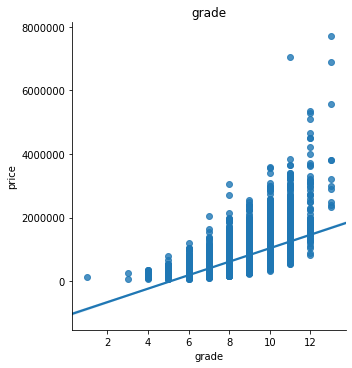

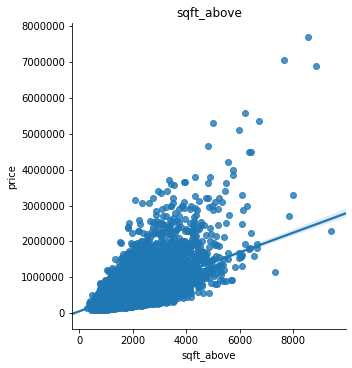

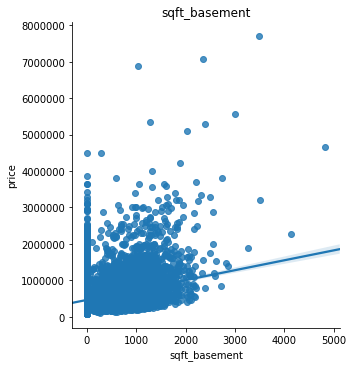

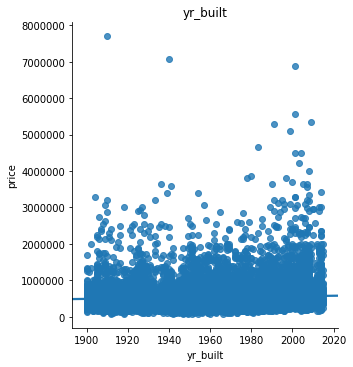

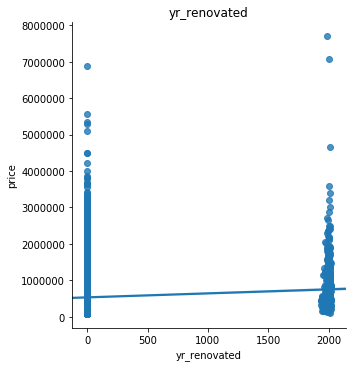

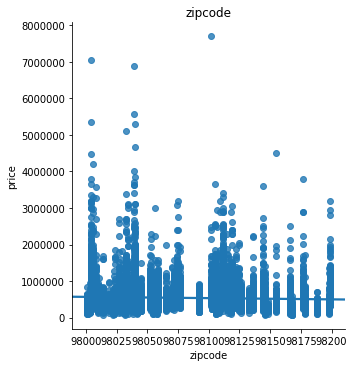

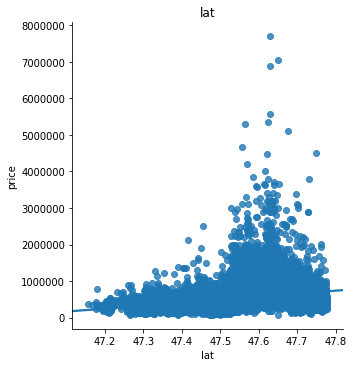

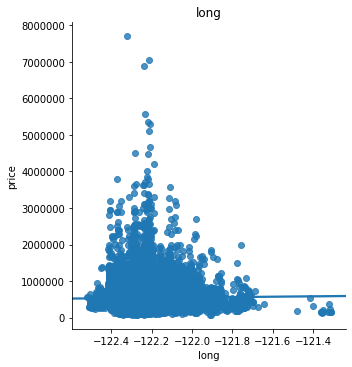

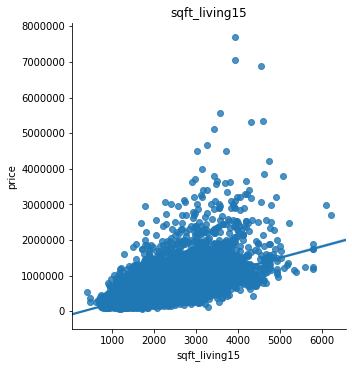

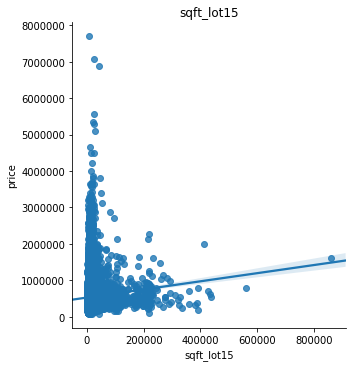

In [16]:
# Check the scatter plots of each

for ind_var in all_cols:
    sns.lmplot(x=ind_var, y='price', data=data_set,fit_reg=True)
#     data_set.plot.scatter(x = ind_var, y = 'price', alpha = 0.4)
    plt.title(f'{ind_var}')


# Remove outliers

In [17]:
# Find indices of outliers in price
remove_price = data_set.index[(data_set['price'] > 6000000)]
remove_price

Int64Index([6903, 7519, 10366], dtype='int64')

In [18]:
# Remove outliers
data_set.drop(remove_price, inplace = True)
data_set.iloc[remove_price]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2
6904,5608000010,2014-08-11,1385000.0,4,3.5,4010,15365,2.0,0,1,...,4010,0,2006,0,98027,47.5528,-122.093,3550,13429,101
7521,2767601100,2014-10-27,513000.0,4,2.0,2090,4000,1.0,0,0,...,1480,610,1951,0,98107,47.6751,-122.379,1510,5000,178
10369,4154302075,2015-01-16,200000.0,2,1.0,830,7200,1.0,0,0,...,830,0,1920,0,98118,47.5604,-122.275,1150,6600,259


In [19]:
# Find house that has 30+ bedrooms

remove_bedroom = data_set.index[(data_set['bedrooms'] > 15)]
remove_bedroom

Int64Index([8597], dtype='int64')

In [20]:
# Remove bedroom

data_set.drop(remove_bedroom, inplace = True)
data_set.iloc[remove_bedroom]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2
8600,1311800040,2014-12-20,260000.0,4,2.75,2240,7200,1.0,0,0,...,1140,1100,1967,0,98001,47.3357,-122.275,1580,7416,232


In [21]:
# waterfront is already categorized and dummied

# Categorical List

In [22]:
categorical = ['view', 'condition', 'zipcode']
dummies1 = pd.get_dummies(data_set, prefix = categorical, columns = categorical, drop_first = True)
len(dummies1.columns), list(dummies1.columns);
# find contin vars & ones that need log/transf out of those
# new col using lat/long & yr blt -> yrs old if you have time

In [23]:
dummies1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,8,...,0,0,0,0,0,0,0,0,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,8,...,0,0,0,0,0,0,0,0,0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,11,...,0,0,0,0,0,0,0,0,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,12,...,0,0,0,0,0,0,0,0,0,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler

# Dummied

In [26]:
predict_this = 'price'
all_cols = list(dummies1.columns)
all_cols.remove('id')
all_cols.remove('date')
all_cols.remove('price')
ind_vars = '+'.join(all_cols)
ind_vars
a = ols(formula = predict_this+'~'+ind_vars, data = dummies1).fit()

In [27]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     825.0
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:58:51   Log-Likelihood:            -2.3122e+05
No. Observations:               17286   AIC:                         4.626e+05
Df Residuals:                   17193   BIC:                         4.633e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.364e+07   6.61e+06     -3.576      0.000   -3.66e+07   -1.07e+07
bedrooms      -2.605e+04   1724.462    -15.107      0.000   -2.94e+04   -2.27e+04
bathrooms      2.335e+04   2863.600      8.154      0.000    1.77e+04     2.9e+04
sqft_living     106.2901      2.012     52.834      0.000     102.347     110.233
sqft_lot          0.2293      0.040      5.728      0.000       0.151       0.308
floors        -4.226e+04   3433.503    -12.309      0.000    -4.9e+04   -3.55e+04
waterfront     5.467e+05   1.71e+04     32.031      0.000    5.13e+05     5.8e+05
grade          6.021e+04   1984.916     30.334      0.000    5.63e+04    6.41e+04
sqft_above       90.4703      2.071     43.693      0.000      86.412      94.529
sqft_basement    15.6926      2.361      6.647      0.000      11.065      20.320
yr_built       -702.7073     71.369     -9.846      0.000    -842.599    -562.816
yr_renovated     15.3177      3.226      4.748      0.000       8.994      21.642
lat            1.843e+05   6.87e+04      2.683      0.007    4.97e+04    3.19e+05
long           -1.29e+05   4.89e+04     -2.637      0.008   -2.25e+05   -3.31e+04
sqft_living15    18.4298      3.154      5.843      0.000      12.248      24.612
sqft_lot15       -0.0484      0.065     -0.748      0.454      -0.175       0.078
date2           117.3846     10.589     11.085      0.000      96.629     138.141
view_1         7.221e+04   9958.529      7.251      0.000    5.27e+04    9.17e+04
view_2          6.58e+04   6038.153     10.897      0.000     5.4e+04    7.76e+04
view_3         1.372e+05   8301.779     16.521      0.000    1.21e+05    1.53e+05
view_4         3.443e+05   1.24e+04     27.683      0.000     3.2e+05    3.69e+05
condition_2    5.549e+04   3.47e+04      1.599      0.110   -1.25e+04    1.24e+05
condition_3    4.354e+04   3.22e+04      1.352      0.177   -1.96e+04    1.07e+05
condition_4    6.356e+04   3.22e+04      1.973      0.049     410.873    1.27e+05
condition_5    1.108e+05   3.24e+04      3.419      0.001    4.73e+04    1.74e+05
zipcode_98002   3.63e+04   1.59e+04      2.289      0.022    5221.659    6.74e+04
zipcode_98003 -2.201e+04   1.41e+04     -1.559      0.119   -4.97e+04    5667.657
zipcode_98004  7.329e+05   2.56e+04     28.597      0.000    6.83e+05    7.83e+05
zipcode_98005   2.47e+05   2.71e+04      9.115      0.000    1.94e+05       3e+05
zipcode_98006  2.326e+05   2.23e+04     10.419      0.000    1.89e+05    2.76e+05
zipcode_98007  2.083e+05   2.78e+04      7.480      0.000    1.54e+05    2.63e+05
zipcode_98008  2.106e+05   2.66e+04      7.907      0.000    1.58e+05    2.63e+05
zipcode_98010  9.673e+04   2.44e+04      3.966      0.000    4.89e+04    1.45e+05
zipcode_98011  4.993e+04   3.46e+04      1.441      0.150    -1.8e+04    1.18e+05
zipcode_98014  9.304e+04   3.81e+04      2.444   

# SKLEARN STUFF

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg = LinearRegression() # lin_reg object
lin_reg.fit(X = dummies1[all_cols], y = dummies1['price']) # fit lin_reg object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
test_data = pd.read_csv('kc_house_data_test_features.csv', index_col = 'Unnamed: 0')

# Before you can predict, transform/change all data to useable forms

In [43]:
test_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [44]:
from datetime import date

test_data['date'] = test_data.date.apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
test_data.date_time = test_data.date.apply(lambda x: date.fromisoformat(x))
type(test_data.date_time[0])

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


datetime.date

In [45]:
import copy
min_date = copy.deepcopy(min(test_data.date_time))
test_data['date2'] = test_data.date_time.apply(lambda x: (x - min_date).days)
test_data.date2

0       117
1       292
2       189
3       215
4       258
       ... 
4318     19
4319    297
4320     52
4321    259
4322    166
Name: date2, Length: 4323, dtype: int64

In [46]:
categorical2 = ['view', 'condition', 'zipcode']
dummies2 = pd.get_dummies(test_data, prefix = categorical, columns = categorical, drop_first = True)
len(dummies2.columns), list(dummies2.columns);

In [51]:

all_cols2 = list(dummies2.columns)
all_cols2.remove('id')
all_cols2.remove('date')
ind_vars2 = '+'.join(all_cols2)
ind_vars2

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+date2+view_1+view_2+view_3+view_4+condition_2+condition_3+condition_4+condition_5+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zi

In [54]:
predicted_y = lin_reg.predict(dummies2[all_cols2]) # use lin_reg object that's fitted
# obs_y = test_data['price']

In [55]:
predicted_y

array([564039.75304088, 584582.0593179 , 387487.01509358, ...,
       315057.20313247, 416498.53380651, 329055.06792066])

In [67]:
pred_y = pd.Series(predicted_y)
pred_y

0       564039.753041
1       584582.059318
2       387487.015094
3       309319.003553
4       571650.362840
            ...      
4318    506241.187100
4319    472155.833923
4320    315057.203132
4321    416498.533807
4322    329055.067921
Length: 4323, dtype: float64

In [69]:
pred_y.to_csv('housing_preds_GL', index = False)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# data_set[['lat', 'price']].groupby('lat').mean().plot.bar()

In [ ]:
data_set.zipcode.value_counts(); # 70 zipcodes in this area

In [ ]:
data_set.sort_values(by = ['zipcode']); #inplace = True #maybe do this later?

# longitude latitude min max ; what do i do with this

In [36]:
data_set.lat.max() - data_set.lat.min() # latitude diff

0.621699999999997

In [37]:
data_set.long.max() - data_set.long.min() # longitude diff

1.2040000000000077

In [ ]:
data_set.lat.max(), data_set.long.max() # max lat and max long

In [ ]:
data_set.lat.min(), data_set.long.min() # min lat and min long

In [26]:
data_set.lat.mean(), data_set.lat.mode()

(47.56005805089656, 0    47.5400
 1    47.5491
 2    47.6821
 3    47.6846
 dtype: float64)

In [24]:
data_set.long.mean(), data_set.long.mode()

(-122.2142584731065, 0   -122.3
 dtype: float64)